<a href="https://colab.research.google.com/github/jpmortaza/analise_youtube/blob/main/PandorgaTech_%3Elegenda_youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

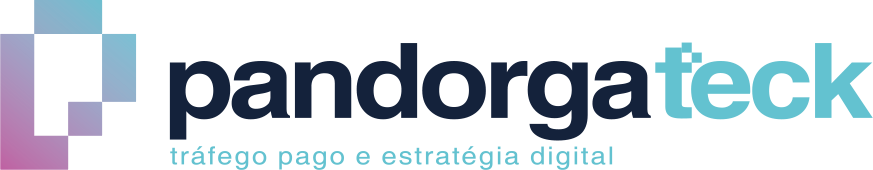

**ETAPAS:**
1. Execute INSTALL 
2. Copie o link do vídeo que quer extraír as legendas.
3. Execute EXTRAIR LEGENDA
4. Insira o Link na caixa de texto.
5. Execute VISUALIZAÇÃO E DOWNLOAD 
6. Abra a pasta na coluna da esquerda. 
7. Faça download do arquivo dados.csv

# INSTALL

In [ ]:
!pip install youtube-transcript-api
!pip install pytube
!pip install wordcloud -q

from pytube import extract
import pandas as pd
from youtube_transcript_api import YouTubeTranscriptApi
from wordcloud import WordCloud

import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('portuguese')
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize

lista = []

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# EXTRAIR LEGENDA

In [ ]:
link_youtube = input("Link do Youtube:")

Link do Youtube:https://www.youtube.com/watch?v=TQqVezTL2xo


In [ ]:
id=extract.video_id(link_youtube)
srt = YouTubeTranscriptApi.get_transcript(id,languages=['pt'])

In [ ]:
for i in srt:
  lista.append(i)

# VISUALIZAÇÃO E DOWNLOAD

In [ ]:
df = pd.DataFrame(lista)
df

,text,start,duration
0,e,0.00,4.520
1,Dezoito de Fevereiro,1.22,3.300
2,quinta-feira ou sexta-feira,9.20,4.600
3,e Dezoito de Fevereiro 19 horas Brasília,14.11,5.690
4,tem a Live hoje porque ontem,17.47,5.129
...,...,...,...
1703,vai mudando o Brasil buscando fazer o,4624.28,4.220
1704,melhor,4626.86,4.920
1705,para todos nós Ok muito obrigado até até,4628.50,7.740
1706,a próxima quinta-feira se Deus quiser né,4631.78,4.460


In [ ]:
#DOWNLOAD EM CSV
df_download = df.to_csv("dados.txt", encoding = 'utf-8')
df_download

# ANALISE

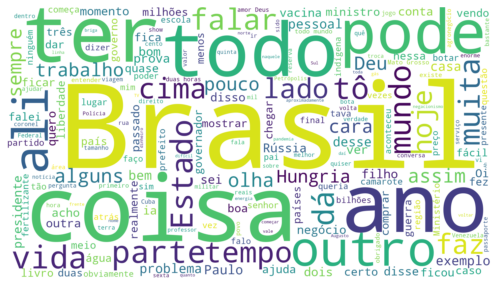

In [ ]:
#NOVO MÓDULO PARA NÚVEM DE PALAVRAS

palavras = " ".join(s for s in df['text'])
# retirar palavras
stopwords.extend(['coisa','comissão','tudo','pessoas','fazer','porque','vamos','vai','deputado','lá','pessoa','gente','tá','aí','né','amanhã','meia','alguma','seis','ainda','geral','ar','partir','rio','grande','manhã','vou','balanço','feira','semana','segunda','quer','então','pra','ser','vem','dia','aqui','agora']) 

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1920, height=1080).generate(palavras)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()


plt.show()

In [ ]:
# QUANTIDADE DE PALAVRAS SEM RETIRAR AS STOPWORDS
print("Quantidade de Palavras: {}".format(len(palavras_lower)))

Quantidade de Palavras: 14854


In [ ]:
#TRANSFORMAR TEXTO EM MINUSCULAS E RETIRAR AS STOPWORDS
palavras_minusculas = word_tokenize(palavras.lower()) 
fd = nltk.FreqDist(w.lower() for w in palavras_minusculas if w not in stopwords)
print("Quantidade de Palavras: {}".format(len(palavras_minusculas)))

Quantidade de Palavras: 11075


In [ ]:
#FREQUENCIA DAS PALAVRAS
from nltk.probability import FreqDist
frequencia = FreqDist(fd)

df_frequencia = pd.DataFrame(frequencia.items(), columns=['Palavra', 'Qtd'])
#NO 'Qtd']>=?? PODMOS DERMINAR O MINIMO DE VEZES QUE A PALAVRA PRECISA TER APAREECIDO NO VÍDEO
df_frequencia_min = df_frequencia['Qtd']>=20
filtered_df = df_frequencia[df_frequencia_min]
filtered_df

,Palavra,Qtd
34,coisa,32
70,brasil,64
87,lado,20
110,ter,26
143,todo,21
144,mundo,25
189,ali,20
254,pode,21
322,parte,20
326,vida,20


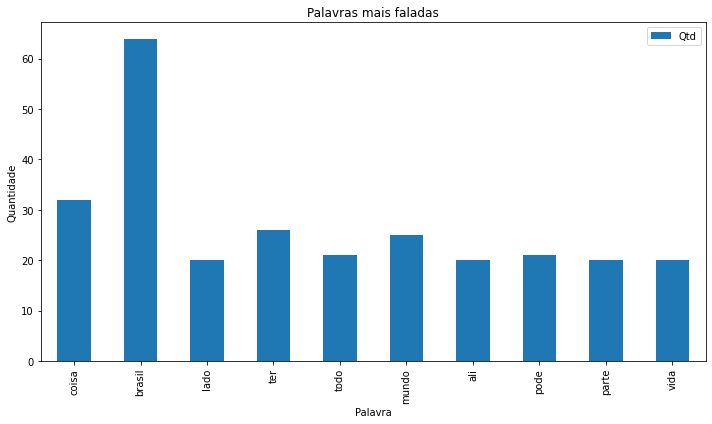

In [ ]:
# PLOTAR A NO GRÁFICO DE BARRAS A FREQUENCIA DAS PALAVRAS NO TEXTO
fig, ax = plt.subplots(figsize=(10,6))

filtered_df.plot(x="Palavra", y="Qtd", kind="bar", ax=ax)

ax.set_title("Palavras mais faladas")
ax.set_xlabel("Palavra")
ax.set_ylabel("Quantidade")

plt.tight_layout()

# MÓDULO EM CONSTRUÇÃO

In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
G = nx.from_pandas_edgelist(df, 'text')

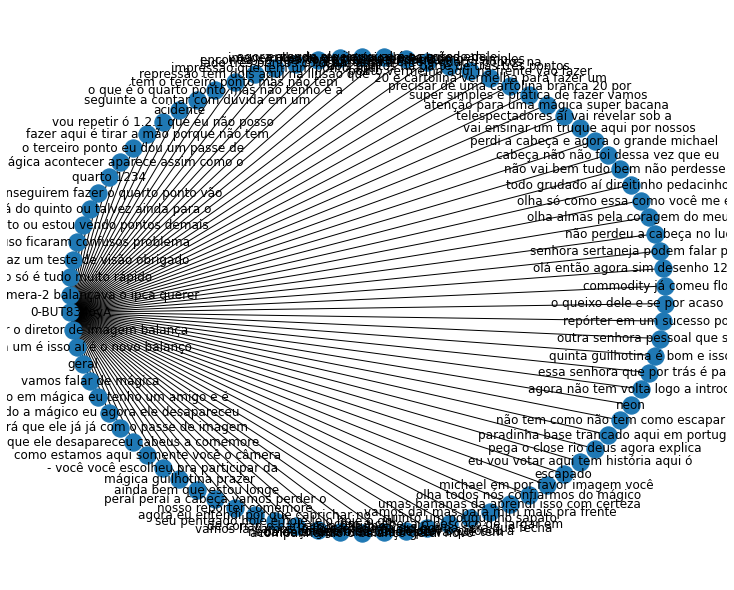

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [ ]:
para = "O programa foi desenvolvido pelo Dr. Jean Mortaza e e tem a função analitica analisar textos de vídeos do Youtube."
words = word_tokenize(para)
print(words)

['O', 'programa', 'foi', 'desenvolvido', 'pelo', 'Dr.', 'Jean', 'Mortaza', 'e', 'e', 'tem', 'a', 'função', 'analitica', 'analisar', 'textos', 'de', 'vídeos', 'do', 'Youtube', '.']


In [ ]:
fd = nltk.FreqDist(w.lower() for w in palavras_lower if w not in stopwords)
fd